# Importing Basic Dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,856.544198
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,574.746278
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,367.632000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1622.344032
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1153.149696


In [ ]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [ ]:
# removing the unnamed: 0 col

df = df[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,856.544198
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,574.746278
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,367.632000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1622.344032
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1153.149696


In [ ]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
# checking for duplicated rows

df.duplicated().sum()

29

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

In [ ]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')

for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

In [ ]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Ram'] = df['Ram'].astype('int32')

df['Weight'] = df['Weight'].str.replace('kg','')
df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


# Exploratory Data Analysis

<ipython-input-171-429a184c948b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'], color='blue')


<Axes: xlabel='Price', ylabel='Density'>

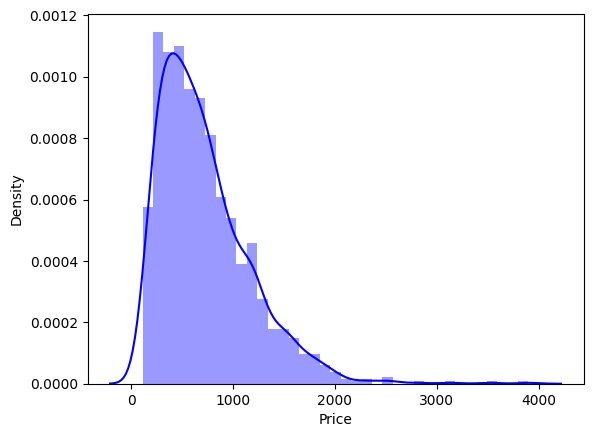

In [ ]:
# Plot the distribution of the price column

sn.distplot(df['Price'], color='blue')

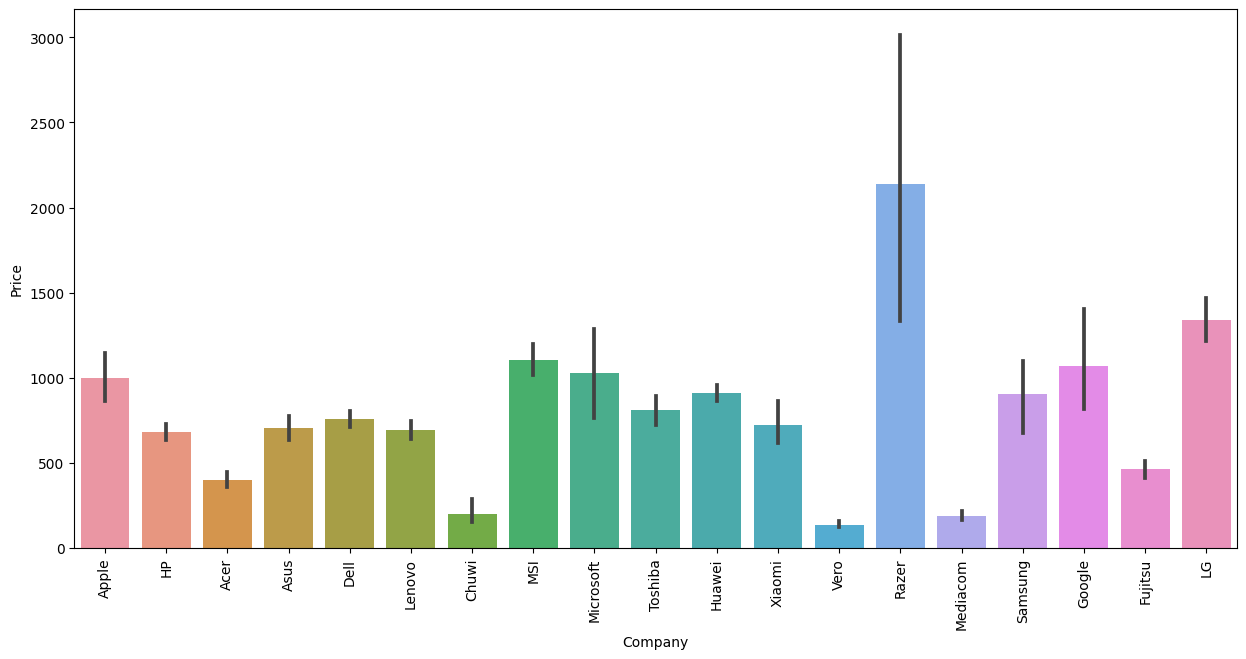

In [ ]:
# average price for each of the laptop brands

plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

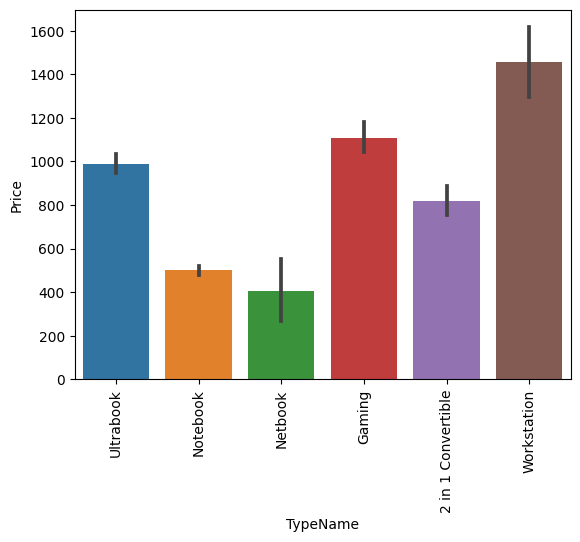

In [ ]:
# laptop type and variation about the price

sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')



<Axes: xlabel='Inches', ylabel='Price'>

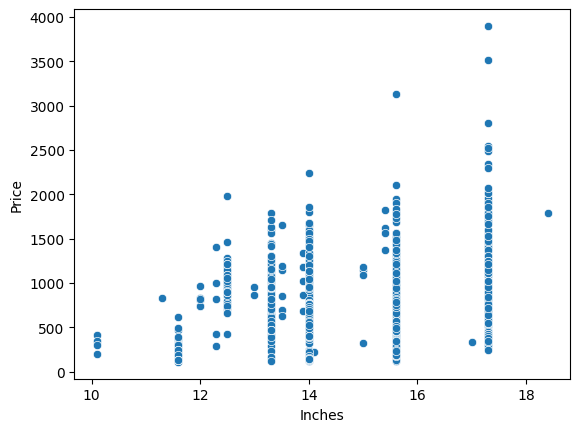

In [ ]:
# variation of inches towards the price

sn.scatterplot(x = df['Inches'],y = df['Price'])

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
# creating a new col,touchscreen if the value is 1 that laptop is touch screen

df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1
                                                      if 'Touchscreen' in element else 0)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0


In [ ]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
633,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.20,370.189440,0
738,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,1.80,1339.126733,0
1243,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.77,1150.208640,1
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,958.400640,1
145,Asus,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.25,702.656640,0


<Axes: xlabel='TouchScreen', ylabel='count'>

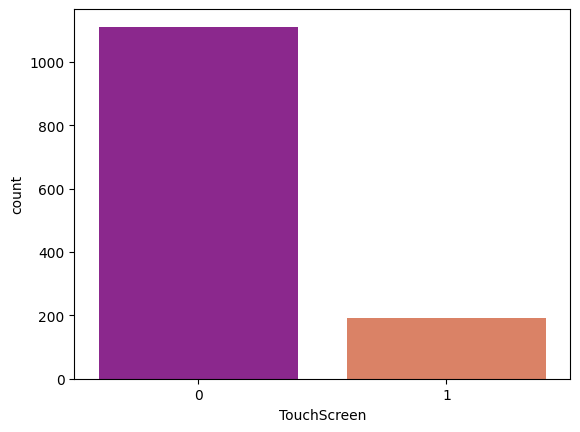

In [ ]:
sn.countplot(x = df['TouchScreen'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

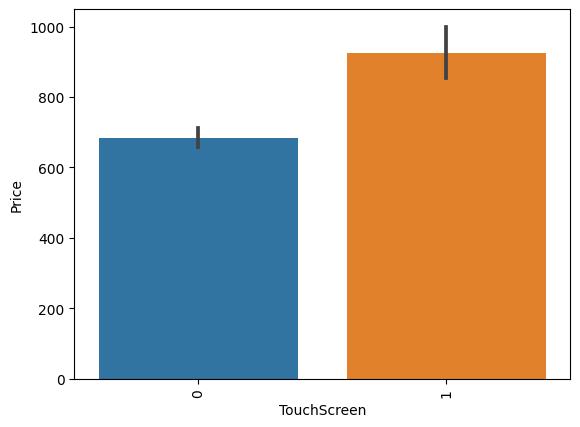

In [ ]:
# touch screen on comparision with price of laptop

sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')

In [ ]:
# creating a new col named IPS,does the laptop have IPS facility or not

df['IPS'] = df['ScreenResolution'].apply(
    lambda element:1 if "IPS" in element else 0
)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1273,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,488.47104,0,0
337,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,731.42784,0,0
494,Asus,Gaming,17.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,24,256GB SSD + 1TB HDD,Nvidia GeForce GTX 965M,Windows 10,4.33,811.34784,1,1
980,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12,512GB SSD,Intel HD Graphics 620,Windows 10,2.19,830.52864,1,1
1068,Dell,Gaming,15.6,4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,3.21,849.70944,0,0


<Axes: xlabel='IPS', ylabel='count'>

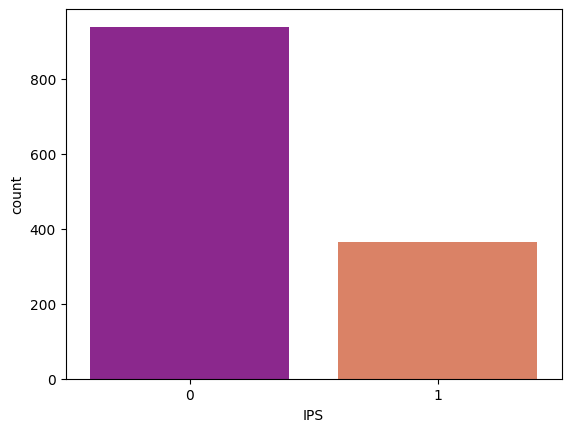

In [ ]:
sn.countplot(x = df['IPS'],palette='plasma')

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

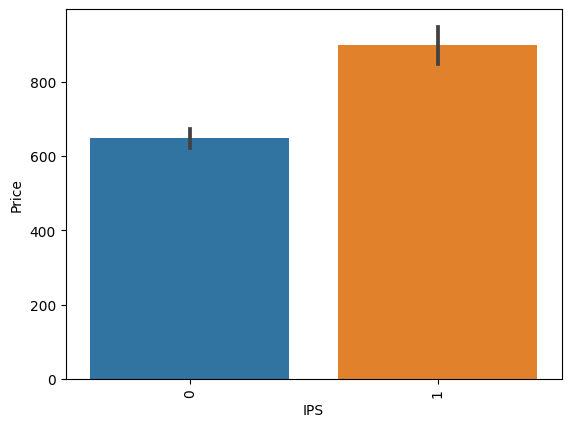

In [ ]:
# price variation with respect to the IPS col

sn.barplot(x = df['IPS'],y = df['Price'])
plt.xticks(rotation = 'vertical')

### Extracting the X Resolution and the Y Resolution

In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [ ]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,IPS Panel Retina Display 2560,1600


In [ ]:
'''
replace all the "," with "" and then find all numbers
from that string as "\d+\.?\d+",\d means that integer number and \.?
all the numbers which come after an number and \d+ the string must end with number

'''


df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,2560,1600


In [ ]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


<ipython-input-182-db80f7b4c870>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

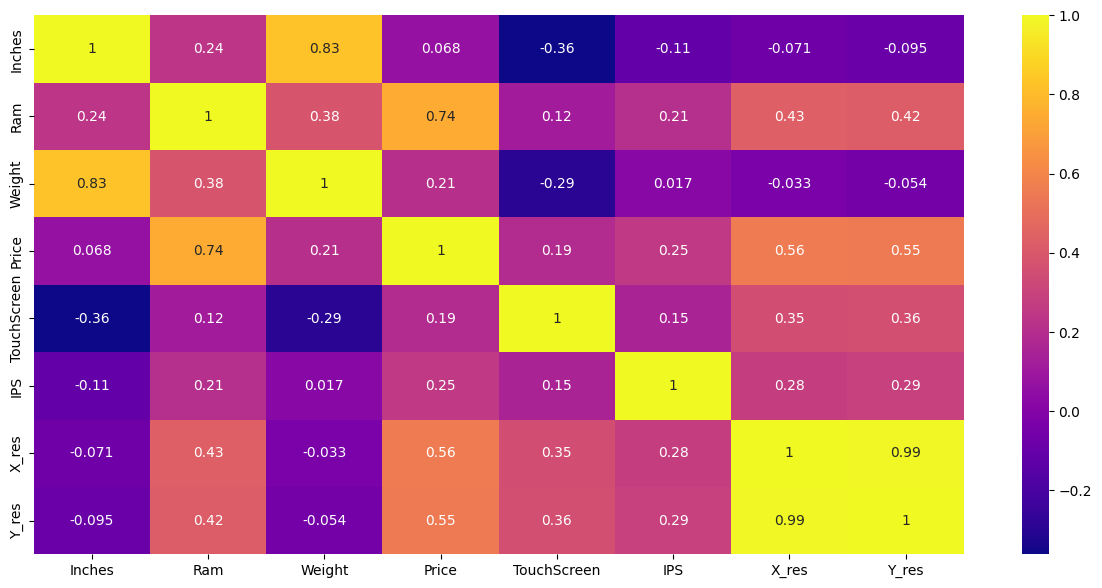

In [ ]:
plt.figure(figsize=(15,7))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

In [ ]:
df.corr()['Price']

<ipython-input-53-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64

**To make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [ ]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,2560,1600,226.983005


In [ ]:
df.corr()['Price']

<ipython-input-56-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [ ]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005


**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [ ]:
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

In [ ]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()


,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5


In [ ]:
'''
If we get any of the intel `i3,i5 or i7` versions
we will return them as it is,but if we get any other processor
we will first check whether is that a variant of the intel? or not
if yes,then we will tag it as "Other Intel Processor" else we will
say it as `AMD Processor`

'''

def processortype(text):

    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text

    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'

        else:
            return 'AMD Processor'



df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

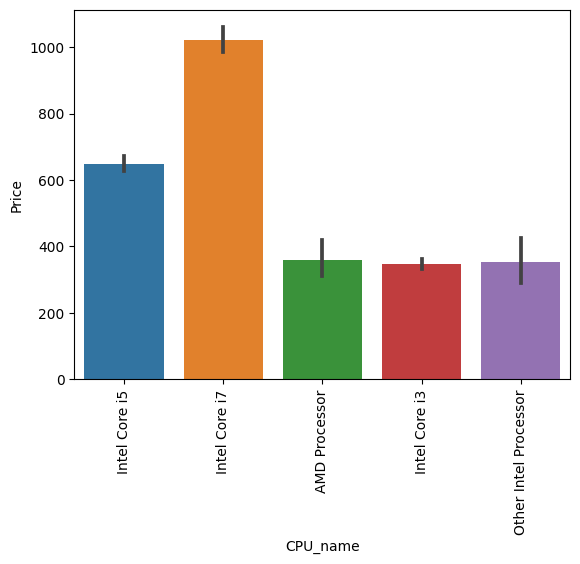

In [ ]:
# price vs processor variation

sn.barplot(x = df['CPU_name'], y = df['Price'])
plt.xticks(rotation = 'vertical')

In [ ]:
## dropping the cpu column

df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5


##### Analysis on the RAM column

<Axes: xlabel='Ram', ylabel='count'>

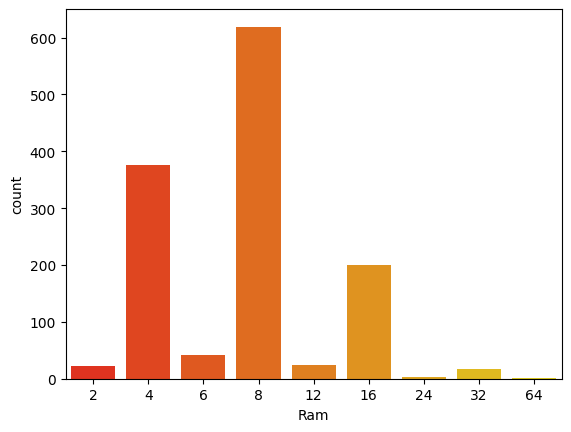

In [ ]:
sn.countplot(x = df['Ram'],palette='autumn')

<Axes: xlabel='Ram', ylabel='Price'>

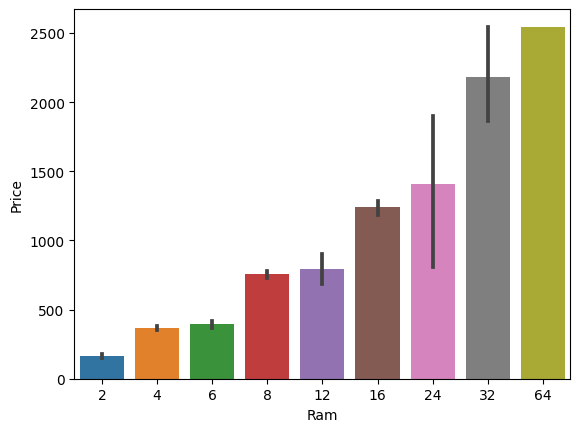

In [ ]:
## ram is having good relation with price

sn.barplot(x = df['Ram'], y = df['Price'])

##### About the memory column

**We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part**

**This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown**

In [ ]:
df['Memory'].iloc[:1][0]

'128GB SSD'

In [ ]:
# we have different categories and also different kinds of variations

df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
## 4 most common variants observed : HHD,SSD,Flash,Hybrid

# this expression will remove the decimal space for example 1.0 TB will be 1TB

df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

# replace the GB word with " "

df['Memory'] = df['Memory'].str.replace('GB','')

# replace the TB word with "000"

df['Memory'] = df['Memory'].str.replace('TB','000')

# split the word accross the "+" character

newdf = df['Memory'].str.split("+",n = 1,expand = True)

newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [ ]:
# we will strip up all the white spaces,basically eliminating white space

df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,256 SSD


In [ ]:
def applychanges(value):

    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)


listtoapply = ['HDD','SSD','Hybrid','FlashStorage']
for value in listtoapply:
    applychanges(value)


df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,128 SSD,0,1,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,128 Flash Storage,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,256 SSD,0,1,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,512 SSD,0,1,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,256 SSD,0,1,0,0


In [ ]:
# remove all the characters just keep the numbers

df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

<ipython-input-197-b2a2a09a6769>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['first'] = df['first'].str.replace(r'\D','')


256     508
1000    250
128     177
512     140
500     132
32       45
64       17
2000     16
16       10
180       5
240       1
8         1
508       1
Name: first, dtype: int64

In [ ]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,128,0,1,0,0,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,128,0,0,0,0,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,256,0,1,0,0,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,512,0,1,0,0,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,256,0,1,0,0,None


In [ ]:
def applychanges1(value):

    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)


listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)


# remove all the characters just keep the numbers

df['Second'] = df['Second'].str.replace(r'\D','')
df['Second'].value_counts()

<ipython-input-199-085e1fa98028>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Second'] = df['Second'].str.replace(r'\D','')


0       1095
1000     187
2000      15
256        3
500        2
512        1
Name: Second, dtype: int64

In [ ]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,...,256,0,1,0,0,0,0,0,0,0


In [ ]:
# multiplying the elements and storing the result in subsequent columns


df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])


## dropping of uncessary columns

df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
1159,HP,2 in 1 Convertible,8,512 SSD,Intel HD Graphics 520,Windows 10,1.48,1304.93376,1,0,220.842824,Intel Core i7,0,512,0,0
1061,Asus,Gaming,16,1000 HDD,Nvidia GeForce GTX 965M,No OS,4.00,638.08128,0,1,127.335675,Intel Core i7,1000,0,0,0
1145,HP,Workstation,8,256 SSD,Nvidia Quadro M1000M,Windows 7,2.00,1214.14464,0,0,141.211998,Intel Core i7,0,256,0,0
370,Asus,2 in 1 Convertible,12,512 SSD + 2000 HDD,Nvidia GeForce GT 940MX,Windows 10,2.26,702.65664,1,0,141.211998,Intel Core i7,2000,512,0,0
259,Lenovo,2 in 1 Convertible,8,512 SSD,Nvidia GeForce GTX 1050M,Windows 10,2.00,1086.27264,1,1,141.211998,Intel Core i7,0,512,0,0


In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
902,Dell,2 in 1 Convertible,16,Intel HD Graphics 615,Windows 10,1.22,1054.30464,1,0,165.632118,Intel Core i7,0,256,0,0
563,Lenovo,Notebook,8,Nvidia Quadro M620M,Windows 10,3.40,1917.44064,0,1,127.335675,Intel Core i7,0,256,0,0
626,Mediacom,Notebook,2,Intel HD Graphics,Windows 10,1.40,152.80704,0,0,157.350512,Other Intel Processor,0,0,0,0
168,Acer,Notebook,8,Nvidia GeForce MX150,Windows 10,3.00,546.01344,0,1,127.335675,Intel Core i5,0,256,0,0
1058,Dell,2 in 1 Convertible,12,Intel HD Graphics 620,Windows 10,1.60,830.52864,1,1,165.632118,Intel Core i7,0,256,0,0


In [ ]:
df.corr()['Price']

<ipython-input-203-9447c1bc3d29>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage         NaN
Name: Price, dtype: float64

**Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [ ]:
df.columns


Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [ ]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256


##### Analysis on GPU

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

**Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

In [ ]:
# this is what we will be doing,extracting the brands
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


<Axes: xlabel='Gpu brand', ylabel='count'>

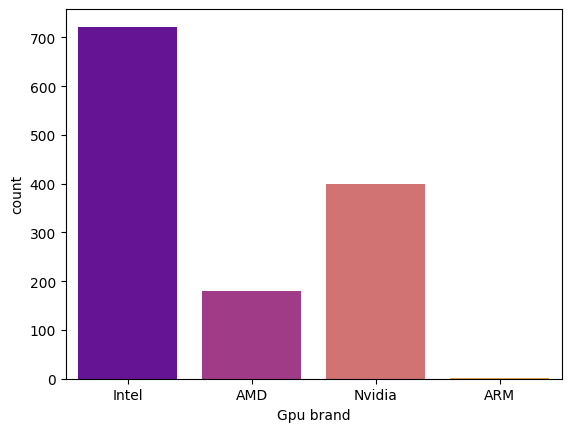

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(x = df['Gpu brand'],palette='plasma')

<Axes: xlabel='Gpu brand', ylabel='count'>

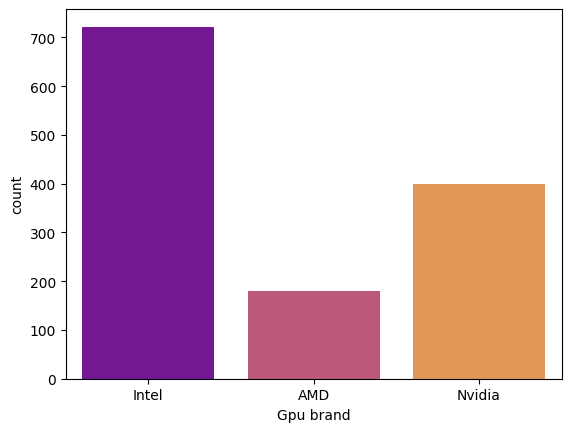

In [ ]:
# removing the "ARM" tuple

df = df[df['Gpu brand']!='ARM']
sn.countplot(x=df['Gpu brand'],palette='plasma')

<Axes: xlabel='Gpu brand', ylabel='Price'>

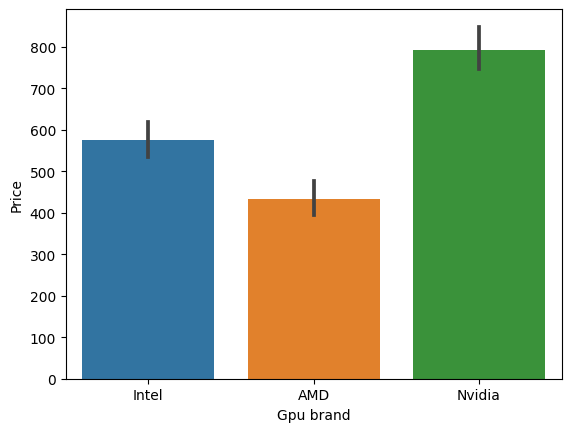

In [ ]:
# price-GPU analysis,i used np.median inorder to check if there is any
# inpact of outlier or not

sn.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)

In [ ]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel


##### Operating System analysis

In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

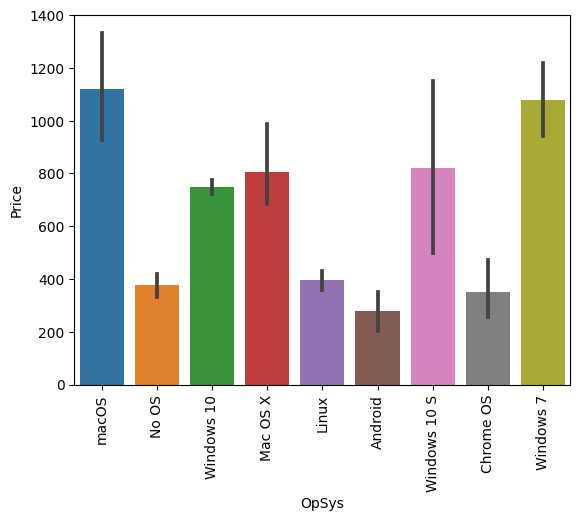

In [ ]:
sn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [ ]:
# club {Windows 10,Windows 7,Windows 7 S}-->Windows
# club {macOS,mac OS X}--> mac
# else return Others

def setcategory(text):

    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'

    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'

    else:
        return 'Other'


df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
939,Dell,Gaming,16,Windows,4.36,1763.35488,0,0,169.780899,Intel Core i7,1000,512,Nvidia
981,Toshiba,Notebook,4,Windows,1.20,764.03520,0,0,165.632118,Intel Core i5,0,128,Intel
594,Lenovo,Notebook,4,Other,2.80,338.22144,0,0,127.335675,Intel Core i3,500,0,Intel
941,Asus,Notebook,4,Windows,2.80,338.86080,0,0,106.113062,Other Intel Processor,1000,0,Nvidia
924,Lenovo,2 in 1 Convertible,8,Windows,1.37,1166.83200,1,1,165.632118,Intel Core i5,0,512,Intel


<Axes: xlabel='OpSys', ylabel='count'>

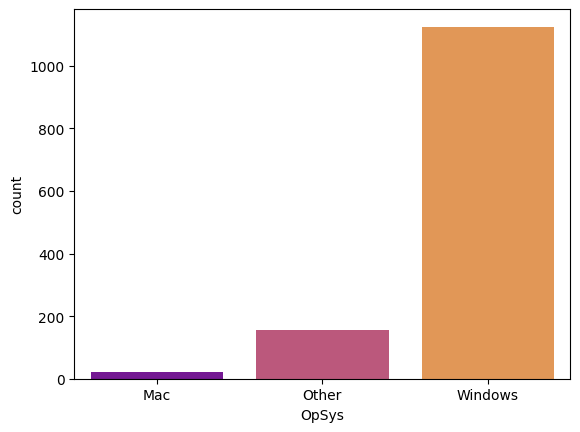

In [ ]:
sn.countplot(x=df['OpSys'],palette='plasma')

(array([0, 1, 2]),
 [Text(0, 0, 'Mac'), Text(1, 0, 'Other'), Text(2, 0, 'Windows')])

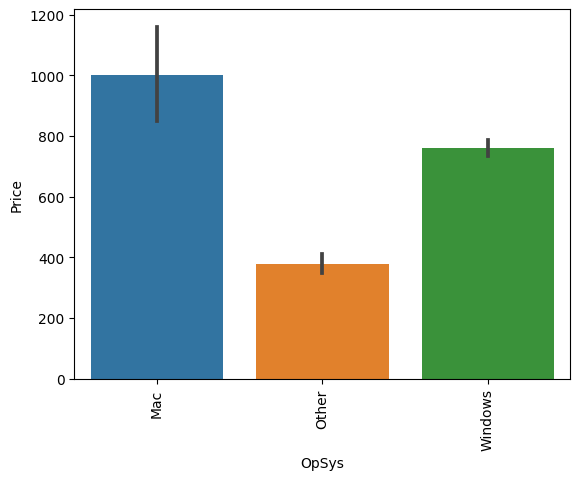

In [ ]:
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.xticks(rotation = 'vertical')

###### Weight analysis

<ipython-input-218-79fb0547ebb4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

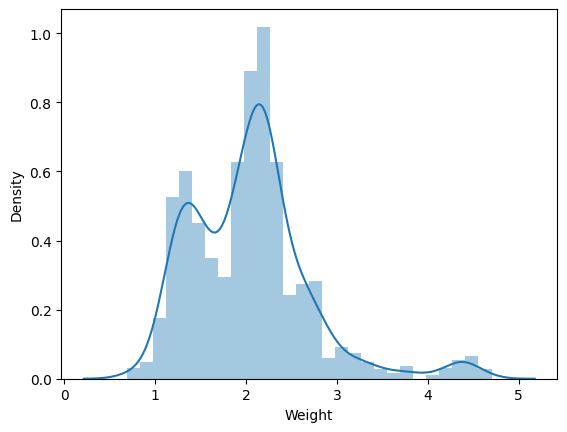

In [ ]:
sn.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

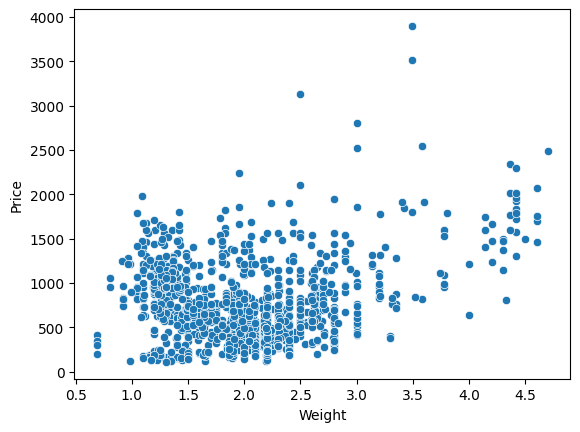

In [ ]:
sn.scatterplot(x=df['Weight'],y=df['Price'])

##### Price Analysis

<ipython-input-220-03596db0dc1f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

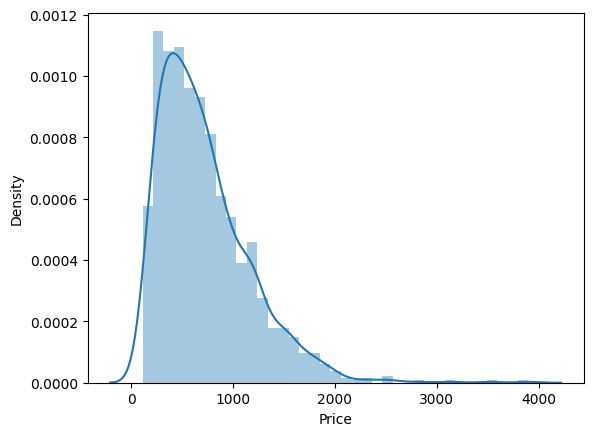

In [ ]:
sn.distplot(df['Price'])

<ipython-input-221-c854314f1920>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(np.log(df['Price']))


<Axes: xlabel='Price', ylabel='Density'>

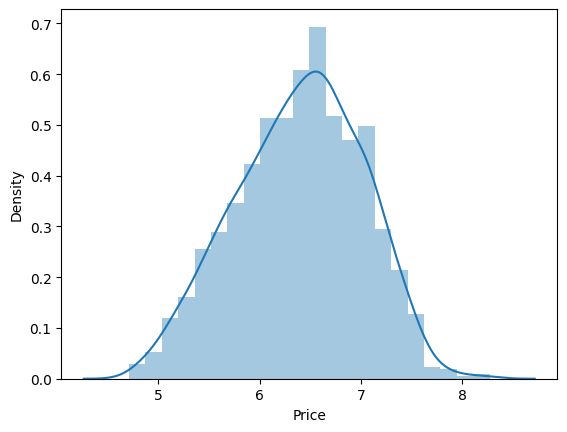

In [ ]:
# so if we apply np.log to the Price col we get a gaussian distibution

sn.distplot(np.log(df['Price']))

In [ ]:
## correlation with price

df.corr()['Price']

<ipython-input-110-fd14992ce99e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price']


Ram            0.742905
Weight         0.209867
Price          1.000000
TouchScreen    0.192917
IPS            0.253320
PPI            0.475368
HDD           -0.096891
SSD            0.670660
Name: Price, dtype: float64

<ipython-input-111-28e201989ca9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(),annot=True,cmap='plasma')


<Axes: >

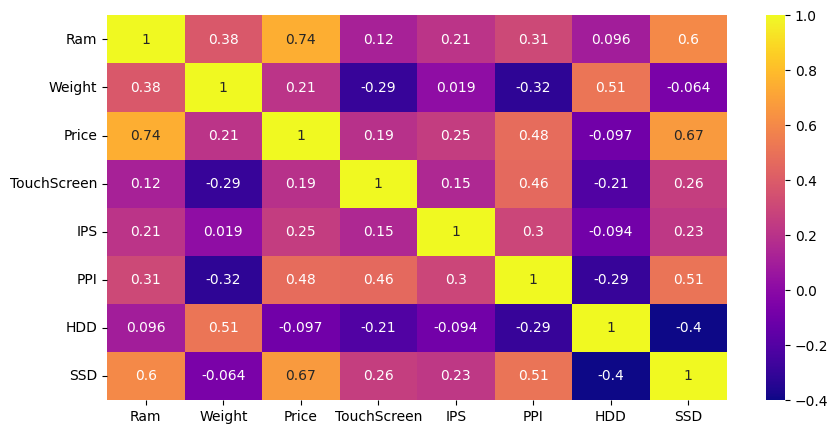

In [ ]:
plt.figure(figsize=(10,5))
sn.heatmap(df.corr(),annot=True,cmap='plasma')

## Model Building

In [ ]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1106, 12), (196, 12))

**There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables**

In [ ]:
# get the index numbers of the columns which are having categorical variables
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

### Ridge Regression

In [ ]:
# we will apply one hot encoding on the columns with this indices-->[0,1,3,8,11]
# the remainder we keep as passthrough i.e no other col must get effected
# except the ones undergoing the transformation!

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8127331031311809
MAE 0.20926802242582976


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


### Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8838344538483813
MAE 0.16016018833129586


In [ ]:
# Save model
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

## Prediction on the whole Dataset

In [ ]:
# Load model
import pickle

with open('pipe.pkl','rb') as f:
  rf = pickle.load(f)
  f.close()

In [ ]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))

predicted

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHo

[array([6.76214142]),
 array([6.44211518]),
 array([6.14385188]),
 array([7.41069447]),
 array([6.89940006]),
 array([5.50035467]),
 array([7.05013483]),
 array([6.44211518]),
 array([7.01582483]),
 array([6.37966222]),
 array([5.78408846]),
 array([5.53161862]),
 array([7.29283919]),
 array([5.82741749]),
 array([6.75289055]),
 array([6.89940006]),
 array([6.29915466]),
 array([7.41069447]),
 array([5.86845921]),
 array([6.61941203]),
 array([5.06329696]),
 array([6.43642223]),
 array([5.32701082]),
 array([6.36856604]),
 array([6.43112257]),
 array([5.67013824]),
 array([6.46970113]),
 array([6.25169342]),
 array([6.72280996]),
 array([6.36891644]),
 array([5.20801788]),
 array([5.55779233]),
 array([5.74171862]),
 array([7.21934078]),
 array([6.46970113]),
 array([5.19684843]),
 array([5.5081089]),
 array([6.48559779]),
 array([5.93068953]),
 array([6.3729993]),
 array([5.62227433]),
 array([6.86256308]),
 array([5.94509499]),
 array([6.13513374]),
 array([6.52202531]),
 array([6.89

In [ ]:
# as we transformed our price variable to np.log
# we have to retranform it from np.log-->np.exp inorder to get the result

ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [ ]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel,864.491456
1,Apple,Ultrabook,8,Mac,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel,627.733165
2,HP,Notebook,8,Other,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel,465.844496
3,Apple,Ultrabook,16,Mac,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD,1653.574311
4,Apple,Ultrabook,8,Mac,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel,991.679592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Windows,1.80,407.911680,1,1,157.350512,Intel Core i7,0,128,Intel,429.765966
1299,Lenovo,2 in 1 Convertible,16,Windows,1.30,958.400640,1,1,276.053530,Intel Core i7,0,512,Intel,1032.895421
1300,Lenovo,Notebook,2,Windows,1.50,146.413440,0,0,111.935204,Other Intel Processor,0,0,Intel,156.862549
1301,HP,Notebook,6,Windows,2.19,488.471040,0,0,100.454670,Intel Core i7,1000,0,AMD,457.229362


<ipython-input-246-427f280e5626>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
<ipython-input-246-427f280e5626>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted

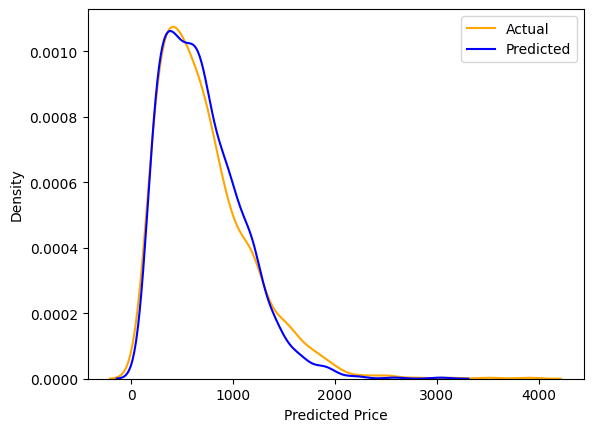

In [ ]:
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

## Content Filtering

In [ ]:
!pip install neattext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 2.4 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
import neattext.functions as nfx
import seaborn as sn

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [2]:
df2 = pd.read_csv('laptop_data.csv')
df2 = df2[['Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price']]
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,856.544198
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,574.746278
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,367.632000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1622.344032
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1153.149696


In [ ]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel


In [20]:
baseRecDf = pd.DataFrame({"description": df2["Company"] + " " + df2["TypeName"] + " " + df2["OpSys"] + " " + df2["ScreenResolution"] + " " +\
df2["Cpu"] + " " + df2["Ram"] + " RAM " + df2["Memory"] + " " + df2["Gpu"]})

In [24]:
row = pd.Series({"description": "description"})

pd.concat([
    baseRecDf,
    pd.DataFrame([row], columns = row.index)
]).reset_index(drop = True)

,description
0,Apple Ultrabook macOS IPS Panel Retina Display...
1,Apple Ultrabook macOS 1440x900 Intel Core i5 1...
2,HP Notebook No OS Full HD 1920x1080 Intel Core...
3,Apple Ultrabook macOS IPS Panel Retina Display...
4,Apple Ultrabook macOS IPS Panel Retina Display...
...,...
1299,Lenovo 2 in 1 Convertible Windows 10 IPS Panel...
1300,Lenovo Notebook Windows 10 1366x768 Intel Cele...
1301,HP Notebook Windows 10 1366x768 Intel Core i7 ...
1302,Asus Notebook Windows 10 1366x768 Intel Celero...


In [25]:
baseRecDf

,description
0,Apple Ultrabook macOS IPS Panel Retina Display...
1,Apple Ultrabook macOS 1440x900 Intel Core i5 1...
2,HP Notebook No OS Full HD 1920x1080 Intel Core...
3,Apple Ultrabook macOS IPS Panel Retina Display...
4,Apple Ultrabook macOS IPS Panel Retina Display...
...,...
1298,Lenovo 2 in 1 Convertible Windows 10 IPS Panel...
1299,Lenovo 2 in 1 Convertible Windows 10 IPS Panel...
1300,Lenovo Notebook Windows 10 1366x768 Intel Cele...
1301,HP Notebook Windows 10 1366x768 Intel Core i7 ...


In [ ]:
def clean_description(recDf):
  # generating clean text by removing the stopwords and special characters
  recDf['clean_description'] = recDf['description'].apply(lambda x: x.lower().strip())
  recDf['clean_description'] = recDf['clean_description'].apply(nfx.remove_stopwords)
  recDf['clean_description'] = recDf['clean_description'].apply(nfx.remove_special_characters)

def getcosinemat(recDf):
  # vectorizing the Clean_description
  countvect = CountVectorizer()
  cv_mat = countvect.fit_transform(recDf['clean_description'])
  return cv_mat

def cosinesimmat(cv_mat):
    return cosine_similarity(cv_mat)

def recommend_laptops(baseRecDf, description, num_rec = 20):
  recDf = baseRecDf.append({"description": description}, ignore_index=True)
  clean_description(recDf)
  cosine_sim_mat = cosinesimmat(getcosinemat(recDf))

  scores = list(enumerate(cosine_sim_mat[-1]))
  sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
  selected_desc_index = [i[0] for i in sorted_scores[1:]]

  return selected_desc_index[:num_rec]


In [ ]:
selected_desc_index = recommend_laptops(baseRecDf, "Windows 10, 64GB RAM, 1TB")

<ipython-input-145-b5920fc57899>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recDf = baseRecDf.append({"description": description}, ignore_index=True)


In [ ]:
df2.iloc[selected_desc_index]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
447,Dell,Workstation,15.6,Full HD 1920x1080,Intel Xeon E3-1505M V6 3GHz,8GB,64GB Flash Storage + 1TB HDD,Nvidia Quadro M620,Windows 10,2.23kg,1274.244480
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,2541.456000
723,Dell,Gaming,17.3,4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36kg,2339.673984
780,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070M,Windows 10,4.42kg,2294.535168
321,Lenovo,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,4GB,1TB HDD,Nvidia GeForce 920MX,Windows 10,2.79kg,376.583040
842,HP,Notebook,17.3,1600x900,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.63kg,581.817600
964,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.50GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,541.218240
1208,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2.0GHz,8GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,402.157440
1216,Acer,Notebook,17.3,1600x900,Intel Core i3 6006U 2GHz,4GB,1TB HDD,Nvidia GeForce 940MX,Windows 10,3.3kg,382.337280
29,HP,Notebook,17.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.5kg,572.866560


# Predict price from user inputs

In [ ]:
# Load model
import pickle

with open('pipe.pkl','rb') as f:
  rf = pickle.load(f)
  f.close()

In [ ]:
df = pd.read_csv('transformed_data.csv')
df = df.drop(columns=["Unnamed: 0"])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,856.544198,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,574.746278,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,367.632000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,1622.344032,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,1153.149696,0,1,226.983005,Intel Core i5,0,256,Intel


In [ ]:
df2 = pd.read_csv('laptop_data.csv')
df2 = df2.drop(columns=["Unnamed: 0"])
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,856.544198
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,574.746278
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,367.632000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1622.344032
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1153.149696


In [ ]:
# Imputs: Company, TypeName, OS, Ram, Disk in GB, CPU, Gpu brand
print('Companies: ', df["Company"].unique())
print('TypeNames: ', df["TypeName"].unique())
print('OS: ', df2["OpSys"].unique())
print('RAM: ', [2, 4, 6, 8, 12, 16, 24, 32, 64])
print('Disk: ', [32, 64, 128, 256, 512, 1024, 2048])
print('CPU: ', df["CPU_name"].unique())
print('GPU: ', df["Gpu brand"].unique())

Companies:  ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
TypeNames:  ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
OS:  ['macOS' 'No OS' 'Windows 10' 'Mac OS X' 'Linux' 'Android' 'Windows 10 S'
 'Chrome OS' 'Windows 7']
RAM:  [2, 4, 6, 8, 12, 16, 24, 32, 64]
Disk:  [32, 64, 128, 256, 512, 1024, 2048]
CPU:  ['Intel Core i5' 'Intel Core i7' 'AMD Processor' 'Intel Core i3'
 'Other Intel Processor']
GPU:  ['Intel' 'AMD' 'Nvidia']


In [ ]:
# company, typename, os, ram, disk, cpu, gpu = 'Apple', None, 'macOS', 32, None, None, None
company, typename, os, ram, disk, cpu, gpu = None, None, 'Windows', 64, 512, "Intel Core i7", None

In [ ]:
def getOs(os):
  if os is None:
    return None

  if "mac" in os.lower():
    return "Mac"
  return "Windows" if "windows" in os.lower() else "Other"

def getDisk(disk):
  if disk is None:
    return None

  if disk < 1024:
    return f"{disk}GB SSD"
  return "1TB" if disk ==  1024 else "2TB"

def getRows(company, typename, os, ram, disk, cpu, gpu):
  row = {
    "Company": company,
    "TypeName": typename,
    "OpSys": getOs(os),
    "Ram": ram,
    "SSD": disk,
    "CPU_name": cpu,
    "Gpu brand": gpu
  }

  row2 = {
      "Company": company,
      "TypeName": typename,
      "OpSys": os,
      "Ram": f"{ram}GB RAM" if ram is not None else None,
      "Memory": getDisk(disk),
      "Cpu": cpu,
      "Gpu": gpu
  }

  return row, row2


def getDescription(row2):
  words = [v if v is not None else '' for v in row2.values()]
  return ' '.join(words).strip()


def getRecDf(selected_desc_index, row):
  recDf = df.iloc[selected_desc_index].drop(columns=['Price'])
  # Fill user inputs
  for k, v in row.items():
    if v is None:
      continue
    recDf[k] = v
  return recDf

def modelPredict(recDf):
  predicted = []
  test = np.array(recDf)
  for i in range(len(test)):
      predicted.append(rf.predict([test[i]]))

  # as we transformed our price variable to np.log
  # we have to retranform it from np.log-->np.exp inorder to get the result
  ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]
  recDf['Predicted Price'] = np.array(ans)


def predictPriceRange(company, typename, os, ram, disk, cpu, gpu):
  row, row2 = getRows(company, typename, os, ram, disk, cpu, gpu)
  print(getDescription(row2))
  selected_desc_index = recommend_laptops(baseRecDf, getDescription(row2))
  recDf = getRecDf(selected_desc_index, row)

  modelPredict(recDf)
  min = recDf["Predicted Price"].min()
  max = recDf["Predicted Price"].max()
  return recDf, min, max, df2.iloc[selected_desc_index]

In [ ]:
company, typename, os, ram, disk, cpu, gpu = None, None, 'Windows 10', 64, 1024, "Intel Core i7", None
recDf, min, max, relevants = predictPriceRange(company, typename, os, ram, disk, cpu, gpu)

Windows 10 64GB RAM 1TB Intel Core i7


<ipython-input-145-b5920fc57899>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  recDf = baseRecDf.append({"description": description}, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ba

In [ ]:
recDf

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
134,HP,Notebook,64,Windows,2.05,0,0,100.454670,Intel Core i7,1000,1024,Intel,978.226415
275,Dell,Notebook,64,Windows,2.30,0,0,100.454670,Intel Core i7,1000,1024,Intel,970.290195
978,HP,Notebook,64,Windows,2.04,0,0,100.454670,Intel Core i7,1000,1024,Intel,986.123621
1066,Asus,Gaming,64,Windows,3.58,0,1,127.335675,Intel Core i7,0,1024,Nvidia,1837.988887
190,Lenovo,2 in 1 Convertible,64,Windows,1.42,1,0,209.800683,Intel Core i7,0,1024,Intel,1880.650478
588,Lenovo,Notebook,64,Windows,2.20,1,0,100.454670,Intel Core i7,1000,1024,Intel,1014.098426
399,Lenovo,Ultrabook,64,Windows,1.13,0,1,209.800683,Intel Core i7,0,1024,Intel,1867.566979
77,Dell,Notebook,64,Windows,2.02,0,0,141.211998,Intel Core i7,1000,1024,Intel,1115.217238
323,HP,Notebook,64,Windows,2.10,0,1,100.454670,Intel Core i7,1000,1024,Intel,987.983705
497,HP,Notebook,64,Windows,1.48,0,0,157.350512,Intel Core i7,0,1024,Intel,1245.079182


In [ ]:
min, max

(970.2901946351378, 1880.6504778826984)

In [ ]:
relevants

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
134,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.05kg,382.337280
275,Dell,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.3kg,455.908435
978,HP,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.04kg,370.189440
1066,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6820HK 2.7GHz,64GB,1TB SSD,Nvidia GeForce GTX 980,Windows 10,3.58kg,2541.456000
190,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.42kg,1805.552640
588,Lenovo,Notebook,15.6,Touchscreen 1366x768,Intel Core i7 8550U 1.8GHz,12GB,1TB HDD,Intel HD Graphics 620,Windows 10,2.2kg,389.370240
399,Lenovo,Ultrabook,14.0,IPS Panel 2560x1440,Intel Core i7 7500U 2.7GHz,16GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.13kg,1678.320000
77,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,128GB SSD + 1TB HDD,Intel UHD Graphics 620,Windows 10,2.02kg,546.652800
323,HP,Notebook,15.6,IPS Panel Full HD 1366x768,Intel Core i7 8550U 1.8GHz,8GB,1TB HDD,Intel UHD Graphics 620,Windows 10,2.1kg,576.702720
497,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 7600U 2.8GHz,8GB,1TB SSD,Intel HD Graphics 620,Windows 10,1.48kg,1118.240640
